In [87]:
#import libraries
import math
import time
import sympy as sy
import numpy as np
import scipy.optimize as opt
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from LinApp_Deriv import LinApp_Deriv
from LinApp_Solve import LinApp_Solve
from LinApp_FindSS import LinApp_FindSS
from sympy.utilities.lambdify import lambdify
%matplotlib inline

In [36]:
""" Problem 2 """

' Problem 2 '

In [67]:
#initialize paramters
alpha = .33
k = 5
z = 1
b = 2
t = .1    
h = 24

#create kgrid
kgrid = np.linspace(1,15,25)

In [79]:
#labor supply
def labor_supply(w, pi, k):
    return h - (b/(w*(1 + b)))*(w*h + pi - t)

def labor_demand(w, k):
    return ((1 - alpha)*z/w)**(1/alpha)*k

def profit(w, nd, k):
    return z*k**alpha*nd**(1 - alpha) - w * nd

def get_w(k1):
    if k1 < 5:
        state_init = 0.3
    else:
        state_init  = 0.8
    args = (alpha, k1, z, b, t, h)
    return opt.fsolve(errors, state_init, args = args)[0]

def errors(state, *args):
    alpha, k, z, b, t, h = args
    nd = labor_demand(state, k)
    pi = profit(state, nd ,k)
    ns = labor_supply(state, pi, k)
    error = nd - ns
    return error

def first_deriv(f, x, h = 1e-2):
    return (f(x + h)- f(x - h))/(2*h)
    
def second_deriv(f, x, h = 1e-2):
    return (f(x + h)+ f(x - h) - 2*f(x))/(h**2)

def first_approx(f, x0, x):
     return f(x0) + first_deriv(f, x0)*(x - x0) 
    
def second_approx(f, x0, x):
    return f(x0) + first_deriv(f, x0)*(x - x0) + 0.5* second_deriv(f,x0)*(x - x0) ** 2

In [81]:
state_init = 0.8
k = 5
args = (alpha, k, z, b, t, h)
w = opt.fsolve(errors, state_init, args = args)[0]
print("Equilibirum Wage at k =", k, ":", w)

Equilibirum Wage at k = 5 : 0.627361779044


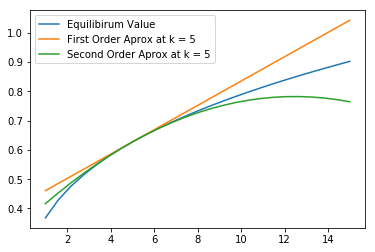

In [83]:
f  = lambda x: get_w(x)
weq = np.zeros_like(kgrid)
wfirst = np.zeros_like(kgrid)
wsecond = np.zeros_like(kgrid)

for i in range(len(kgrid)):
    weq[i] = get_w(kgrid[i])
    wfirst[i] = first_approx(f,5,kgrid[i])
    wsecond[i] = second_approx(f,5,kgrid[i])
    
plt.plot(kgrid, weq , label  = "Equilibirum Value")
plt.plot(kgrid, wfirst, label  = "First Order Aprox at k = 5")
plt.plot(kgrid, wsecond, label  = "Second Order Aprox at k = 5")
plt.legend()
plt.show()

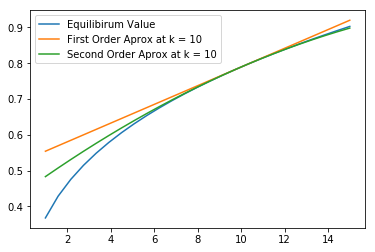

In [84]:
for i in range(len(kgrid)):
    weq[i] = get_w(kgrid[i])
    wfirst[i] = first_approx(f,10,kgrid[i])
    wsecond[i] = second_approx(f,10,kgrid[i])
    
plt.plot(kgrid, weq , label  = "Equilibirum Value")
plt.plot(kgrid, wfirst, label  = "First Order Aprox at k = 10")
plt.plot(kgrid, wsecond, label  = "Second Order Aprox at k = 10")
plt.legend()
plt.show()

In [ ]:
""" Problem 3 """

In [95]:
x = sy.symbols('x')
y = sy.symbols('y')
f = (x**(.35) + 0.9*x - y) **(-2.5) - 0.95*(y**(.35)+0.9*y)**(-2.5)
f_x = sy.diff(f, x) 
f_xx = sy.diff(f1, x) 
f3 = sy.diff(f2, x) 
fp = lambdify((x,y), f1, 'numpy')
fpp = lambdify((x,y), f2, 'numpy')
fppp = lambdify((x,y), f3, 'numpy')

In [ ]:
def cubic_aprox(f, fp, fpp, fppp, x0, x, y0):
    

In [ ]:
""" Problem 4 """